# Keywords analysis

This notebook analyzes keyword trends in articles to identify disease patterns over time.

## 1. Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

## 2. Reading data

In [3]:
df = pd.read_parquet("data/cleaned_parquet/final/P5_final_new.parquet")
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,cleaned_title_tokens_hf,cleaned_abstract_tokens_simple,cleaned_abstract_tokens_hf,disease_title_tokens_simple,disease_title_tokens_hf,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[[CLS], potential, impact, health, care, refor...","[general, article, observes, despite, clear, p...","[[CLS], general, article, observes, despite, c...",[hiv],[hiv],"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections]
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,"[[CLS], new, jersey, health, promotion, diseas...","[general, health, promotion, major, component,...","[[CLS], general, health, promotion, major, com...",[],[],[],[],[],[],[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,"[[CLS], provide, prevent, ##ive, services, ?, ...","[general, health, care, reform, united, states...","[[CLS], general, health, care, reform, united,...",[],[],[],[],[],[],[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,"[[CLS], cy, ##tore, ##duction, small, int, ##e...","[general, cavitron, ultrasonic, surgical, aspi...","[[CLS], general, ca, ##vi, ##tron, ultra, ##so...",[],[],[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]"
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,"[[CLS], racial, differences, access, kidney, t...","[general, previous, work, documented, large, d...","[[CLS], general, previous, work, documented, l...",[],[],[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure]


In [4]:
# Selecting only columns that we will be working with in this file
df = df[["uid", "title", "journal", "abstract", "authors", "affiliations", "mesh_terms", "keywords", "coi_statement", "parsed_date", "disease_mesh_terms_spacy"]].copy()

## 3. Keywords analysis

### 3.1. General analysis

[('', 710784), ('covid-19', 12360), ('inflammation', 6978), ('epidemiology', 6241), ('alzheimer’s disease', 5563), ('hiv', 5542), ('sars-cov-2', 5283), ('cancer', 5091), ('obesity', 4734), ('cardiovascular disease', 4661)]


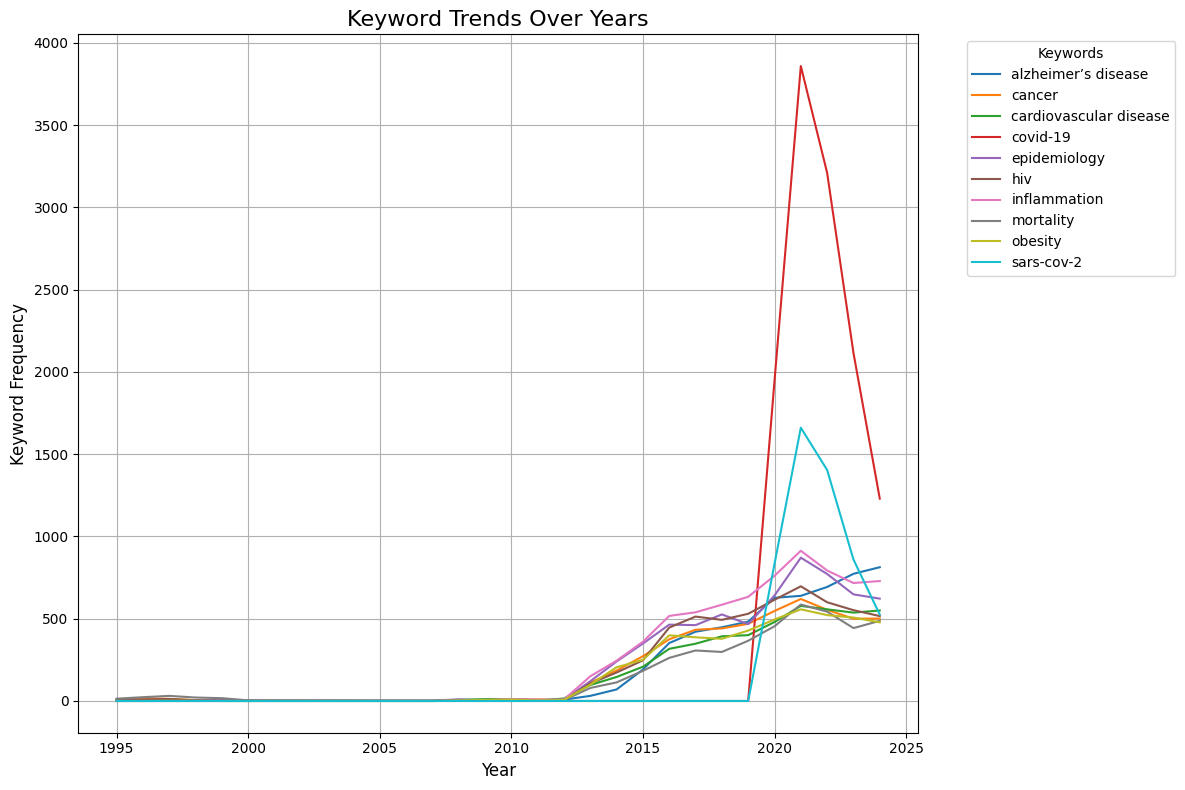

In [6]:
df['parsed_date'] = pd.to_datetime(df['parsed_date'])

df['year'] = df['parsed_date'].dt.year

keyword_rows = (
    df['keywords']
    .dropna()  
    .str.split(';')  
    .explode()  
    .str.strip()  
    .str.lower()  
)

keyword_freq = Counter(keyword_rows)
print(keyword_freq.most_common(10))

keyword_data = pd.DataFrame({
    'keyword': keyword_rows,
    'year': df.loc[keyword_rows.index, 'year']
})

keyword_data = keyword_data[keyword_data['keyword'] != ""]

keyword_trends = (
    keyword_data
    .groupby(['year', 'keyword'])
    .size()
    .reset_index(name='count') 
)

top_keywords = (
    keyword_data['keyword']
    .value_counts()
    .head(10)
    .index
)

top_keyword_trends = keyword_trends[keyword_trends['keyword'].isin(top_keywords)]

pivot_trends = top_keyword_trends.pivot(index='year', columns='keyword', values='count').fillna(0)

plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Keyword Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Keyword Frequency", fontsize=12)
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


We can observe a lack of keyword data before 2012. For the purposes of analysis, we will limit our analysis to the years 2014-2024.

### 3.2. Closer look at 2014-2024

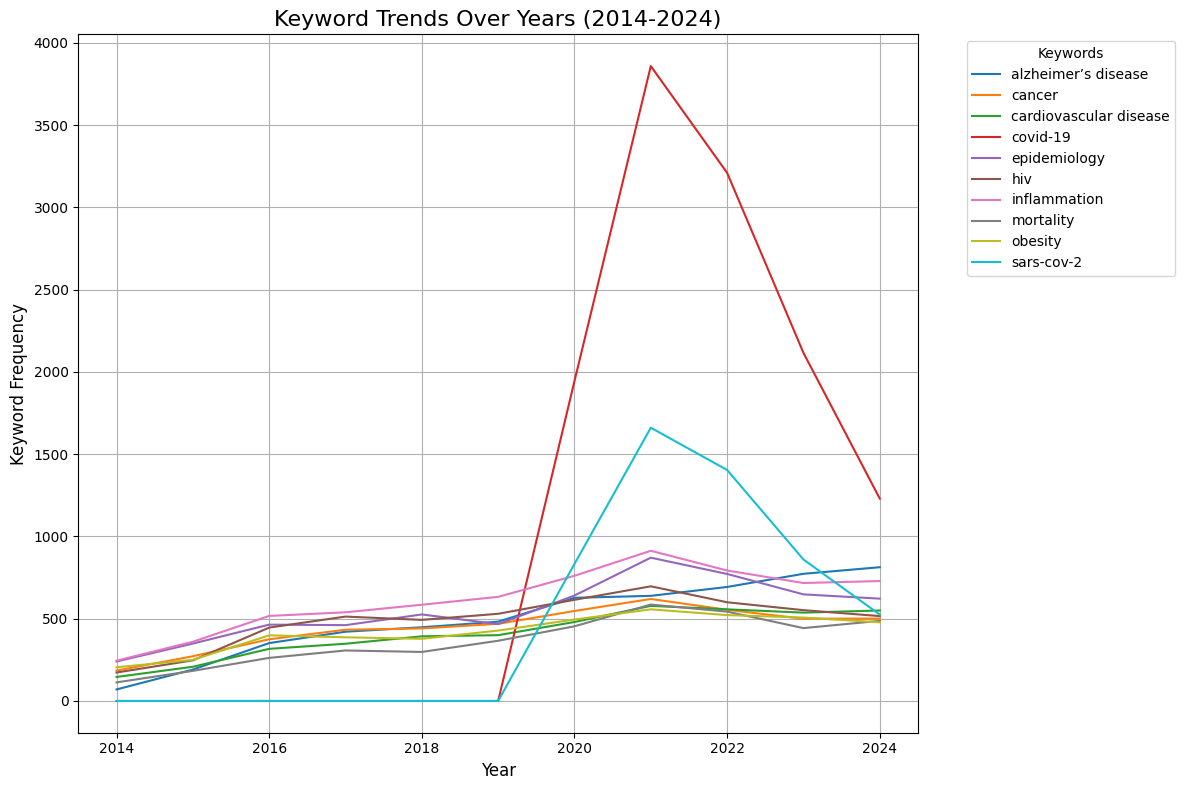

In [7]:
keyword_trends_filtered = keyword_trends[(keyword_trends['year'] >= 2014) & (keyword_trends['year'] <= 2024)]

top_keywords = (
    keyword_data['keyword']
    .value_counts()
    .head(10)
    .index
)

top_keyword_trends_filtered = keyword_trends_filtered[keyword_trends_filtered['keyword'].isin(top_keywords)]

pivot_trends_filtered = top_keyword_trends_filtered.pivot(index='year', columns='keyword', values='count').fillna(0)

plt.figure(figsize=(12, 8))
pivot_trends_filtered.plot(ax=plt.gca())
plt.title("Keyword Trends Over Years (2014-2024)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Keyword Frequency", fontsize=12)
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


We can observe that COVID-19 and SARS-CoV-2 have dominated the keyword trends after 2019. To simplify our analysis, we will exclude these terms from the subsequent graphs.

### 3.3. Excluding COVID-19 and SARS-CoV-2

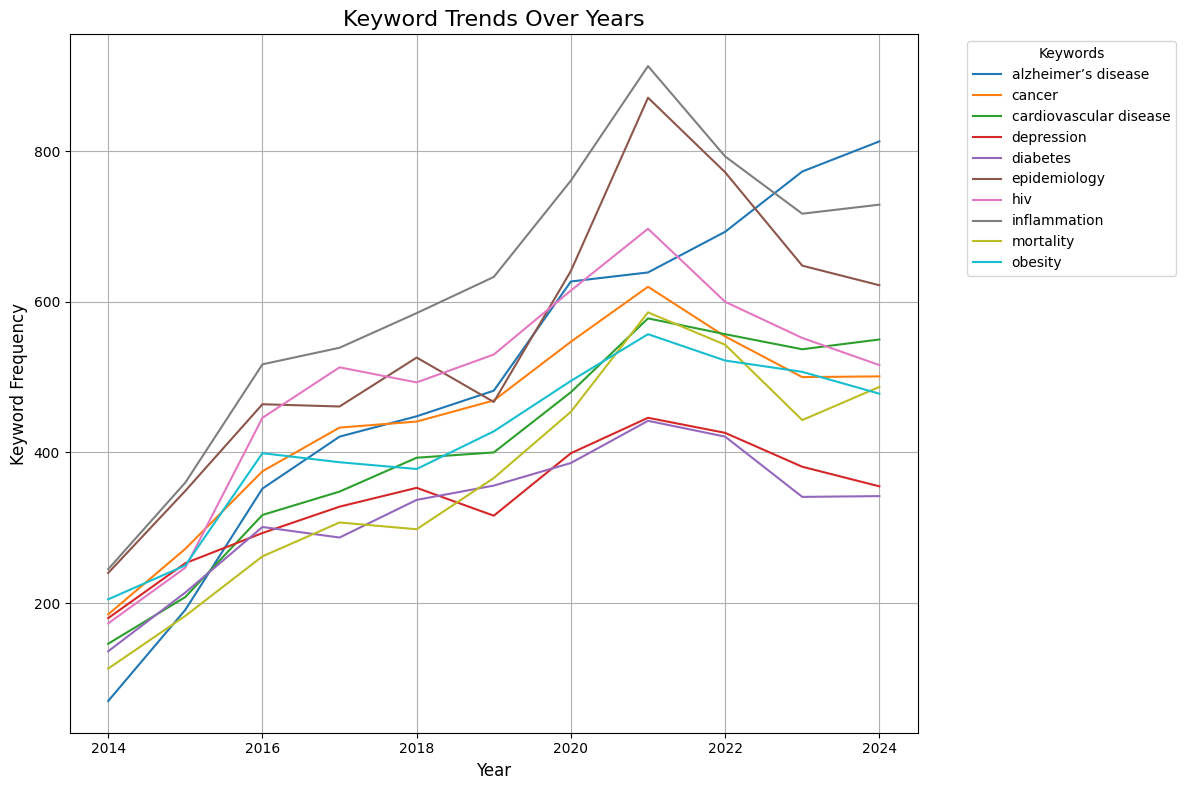

In [ ]:
# Filter out 'sars-cov-2' and 'covid-19' from the keyword trends
keyword_trends_filtered = keyword_trends_filtered[~keyword_trends_filtered['keyword'].isin(['sars-cov-2', 'covid-19'])]

keyword_trends = (
    keyword_data
    .groupby(['year', 'keyword'])
    .size()
    .reset_index(name='count')  
)

top_keywords = (
    keyword_data['keyword']
    .value_counts()
    .head(12)
    .index
)

top_keyword_trends = keyword_trends_filtered[keyword_trends_filtered['keyword'].isin(top_keywords)]

pivot_trends = top_keyword_trends.pivot(index='year', columns='keyword', values='count').fillna(0)
plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Keyword Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Keyword Frequency", fontsize=12)
plt.legend(title="Keywords", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


We can observe that Alzheimer's disease has shown the most rapid growth, appearing in keywords less than 100 times in 2014 and more than 800 times in 2024.

Epidemiology and inflammation have also shown significant growth, peaking in 2021, likely due to the high number of articles associated with COVID-19.

Other frequently occurring keywords exhibit a more consistent growth trend, often peaking in 2021, which is most likely associated with the highest number of articles in that year.

### 3.4. Total number of articles in comparison to articles with keywords

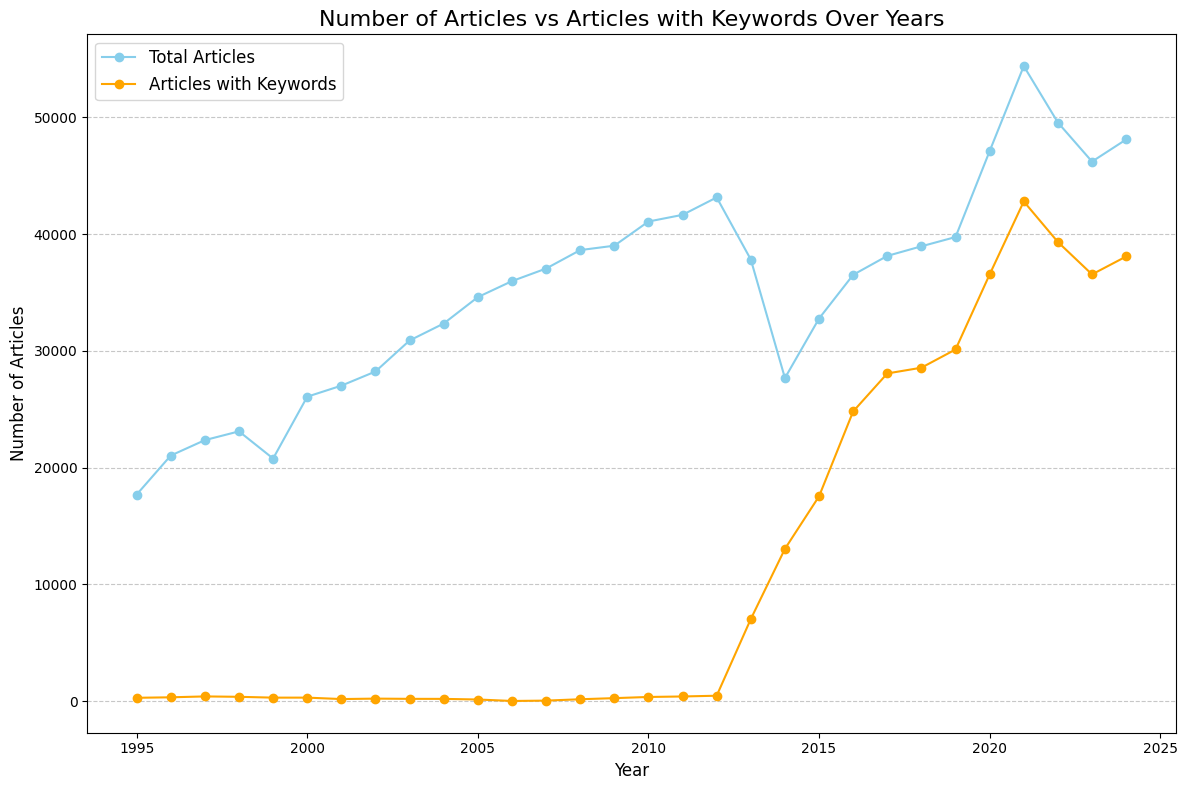

In [12]:
total_articles_per_year = df.groupby('year').size().reset_index(name='total_articles')

articles_with_keywords = df[df['keywords'].str.len() > 0]  
articles_with_keywords_per_year = articles_with_keywords.groupby('year').size().reset_index(name='articles_with_keywords')

articles_trends = pd.merge(
    total_articles_per_year,
    articles_with_keywords_per_year,
    on='year',
    how='outer'
).fillna(0)

articles_trends['total_articles'] = articles_trends['total_articles'].astype(int)
articles_trends['articles_with_keywords'] = articles_trends['articles_with_keywords'].astype(int)

plt.figure(figsize=(12, 8))

plt.plot(
    articles_trends['year'], 
    articles_trends['total_articles'], 
    label="Total Articles", 
    marker='o', 
    linestyle='-', 
    color='skyblue'
)
plt.plot(
    articles_trends['year'], 
    articles_trends['articles_with_keywords'], 
    label="Articles with Keywords", 
    marker='o', 
    linestyle='-', 
    color='orange'
)

plt.title("Number of Articles vs Articles with Keywords Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In the graph above, we observe a significant gap between the total number of articles and the number of articles with keywords before 2012.

Due to this discrepancy, we will perform a deeper analysis on Mesh terms.

### 4. Conclusions

1. There is a lack of articles with keywords before 2012.

2. Keywords are often associated with names or types of diseases.

3. COVID-19 and SARS-CoV-2 have dominated the keyword trends after 2019.

4. Alzheimer's disease has shown the most rapid growth in recent years, appearing in keywords less than 100 times in 2014 and more than 800 times in 2024.

5. Epidemiology and inflammation have also shown significant growth, peaking in 2021, likely due to the high number of articles associated with COVID-19.

6. Other frequently occurring disease-related keywords exhibit a more consistent growth trend, often peaking in 2021, which is most likely associated with the highest number of articles in that year.
